SMOTE & Random Forest

failed

In [60]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [61]:
#check if seaborn is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'seaborn'])
except subprocess.CalledProcessError:
    # Seaborn is not installed
    %pip install seaborn
else:
    print('Seaborn is already installed.')

Seaborn is already installed.


In [62]:
#check if plotly is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'plotly'])
except subprocess.CalledProcessError:
    # plotly is not installed
    %pip install plotly
else:
    print('plotly is already installed.')



plotly is already installed.


In [63]:
#check if xgboost is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'xgboost'])
except subprocess.CalledProcessError:
    # xgboost is not installed
    %pip install xgboost
else:
    print('xgboost is already installed.')

xgboost is already installed.


In [64]:
# import necessary libraries

import pandas as pd
import numpy as np
import xgboost as xgb
import datetime


from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec # to do the grid of plots


# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [65]:
# import populated_df as df

df = pd.read_csv('populated_df.csv')

In [66]:
#Sort the tagged data according to the member and subject

df.sort_values(by=['Konu','Üye'])

df

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,0,0
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,0,0
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,0,0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,0,0
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,2428472503,45103129645,8271,1,4,1,0,80,2021-09-29 07:09:59,2021-09-29 07:14:40,254,827926,2,4,6,7,0,0,0,0,0
7874,2428472503,45103129645,8271,1,5,0,0,100,2021-09-29 07:14:31,2021-09-29 07:15:17,19,827926,2,4,6,7,0,0,0,1,9
7875,2428472503,590286074810,9839,1,5,0,0,100,2021-09-29 07:15:10,2021-09-29 07:20:16,143,827926,2,4,6,6,0,0,0,0,0
7876,2428472503,120928860188,8892,1,10,0,0,100,2021-09-29 18:55:21,2021-09-29 18:56:32,45,850540,2,2,6,6,0,0,0,0,0


In [67]:
df['Label'].value_counts()

# we have 7878 rows data and 290 of them are labeled as 1. This means that 290 members attempted gaming the system.


0    7588
1     290
Name: Label, dtype: int64

In [68]:
# get the gaming the system data

df.loc[df['Label'] == 1]

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
7,2910824,182157124583,10002,1,5,5,0,50,2021-09-17 18:27:23,2021-09-17 18:28:56,73,414086,6,1,3,3,268,2699,2967,1,7
10,2910824,808509304221,9662,1,5,3,2,50,2021-09-23 20:34:34,2021-09-23 20:36:56,119,639881,6,3,7,7,0,988,988,1,12
12,2910824,808509304221,9662,1,7,2,1,70,2021-09-23 20:37:06,2021-09-23 20:39:08,100,639881,6,3,7,7,0,988,988,1,4
16,2910824,636098373206,8971,1,9,1,0,90,2021-09-29 19:09:41,2021-09-29 19:10:39,33,851286,6,2,6,6,104,3489,3593,1,5
17,2910824,636098373206,8971,1,10,0,0,100,2021-09-29 19:10:26,2021-09-29 19:11:20,29,851286,6,2,6,6,104,3489,3593,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,2412813571,354759714339,4462,1,8,2,0,80,2021-09-30 20:42:20,2021-09-30 20:43:08,23,895661,7,11,5,6,3911,3541,7452,1,9
7797,2412813571,354759714339,4462,1,10,0,0,100,2021-09-30 20:45:15,2021-09-30 20:45:59,18,895661,7,11,5,6,3911,3541,7452,1,16
7867,2428472503,573513825105,8897,1,10,0,0,100,2021-09-25 13:19:35,2021-09-25 13:20:47,48,686169,2,2,9,9,3777,813,4590,1,7
7872,2428472503,479944572243,10861,1,5,0,0,100,2021-09-29 06:56:55,2021-09-29 06:58:03,43,827926,2,1,5,5,2975,2913,5888,1,11


In [69]:
# fill with zero if Label column is not 1

df.replace("", 0, inplace=True)

In [70]:
df.head()

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,0,0
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,0,0
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,0,0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,0,0
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,0,0


In [71]:
# check the label value counts

df['Label'].value_counts()

0    7588
1     290
Name: Label, dtype: int64

<AxesSubplot: title={'center': 'Class distribution of the target(Label) variable'}>

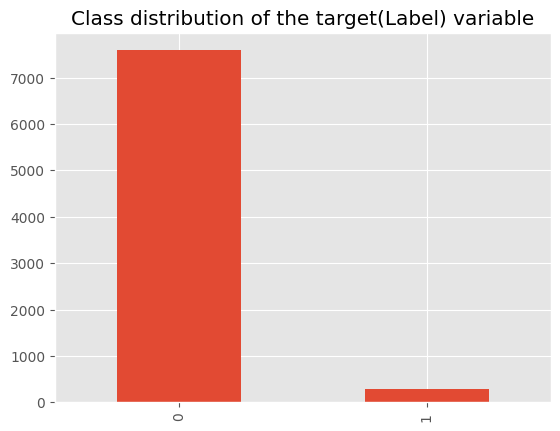

In [72]:
value_counts = df['Label'].value_counts()
value_counts.plot(kind="bar", title="Class distribution of the target(Label) variable")

In [73]:
value_counts

0    7588
1     290
Name: Label, dtype: int64

# ML SIDE

## Classification

In [74]:
#describe the latest df 

df.dtypes

Üye                         int64
Sınav                       int64
Konu                        int64
Sınav Türü                  int64
Doğru Sayısı                int64
Yanlış Sayısı               int64
Boş Sayısı                  int64
Puan                        int64
S_Giriş Zamanı             object
S_Çıkış Zamanı             object
S_süre                      int64
GirişLog                    int64
Sınıf                       int64
Ders                        int64
Aktif Materyal Sayısı       int64
Toplam Materyal Sayısı      int64
cum_lecture_time            int64
cum_study_time              int64
total_study_time            int64
Label                       int64
Overlap (secs.)           float64
dtype: object

In [75]:
#change object type to related datatype. Label and Overlap(secs.) are going to be int64

df['Overlap (secs.)'] = df['Overlap (secs.)'].astype('int64')

df.dtypes

Üye                        int64
Sınav                      int64
Konu                       int64
Sınav Türü                 int64
Doğru Sayısı               int64
Yanlış Sayısı              int64
Boş Sayısı                 int64
Puan                       int64
S_Giriş Zamanı            object
S_Çıkış Zamanı            object
S_süre                     int64
GirişLog                   int64
Sınıf                      int64
Ders                       int64
Aktif Materyal Sayısı      int64
Toplam Materyal Sayısı     int64
cum_lecture_time           int64
cum_study_time             int64
total_study_time           int64
Label                      int64
Overlap (secs.)            int64
dtype: object

In [76]:
# change the datetime type to timestamp

df["S_Giriş Zamanı"] = pd.to_datetime(df["S_Giriş Zamanı"])
df["S_Çıkış Zamanı"] = pd.to_datetime(df["S_Çıkış Zamanı"])

df.dtypes

Üye                                int64
Sınav                              int64
Konu                               int64
Sınav Türü                         int64
Doğru Sayısı                       int64
Yanlış Sayısı                      int64
Boş Sayısı                         int64
Puan                               int64
S_Giriş Zamanı            datetime64[ns]
S_Çıkış Zamanı            datetime64[ns]
S_süre                             int64
GirişLog                           int64
Sınıf                              int64
Ders                               int64
Aktif Materyal Sayısı              int64
Toplam Materyal Sayısı             int64
cum_lecture_time                   int64
cum_study_time                     int64
total_study_time                   int64
Label                              int64
Overlap (secs.)                    int64
dtype: object

In [77]:
pd.options.display.float_format = '{:.0f}'.format

df.describe().T  # T is for transpose

,count,mean,std,min,25%,50%,75%,max
Üye,7878,1161339761,711401247,2910824,541534265,1169096127,1741043361,2428472503
Sınav,7878,508736635601,284960222327,438484723,263598348446,523324425042,776236916976,994722286690
Konu,7878,8218,2095,3536,8120,8893,9579,10905
Sınav Türü,7878,1,2,1,1,1,1,15
Doğru Sayısı,7878,7,4,0,5,8,10,90
Yanlış Sayısı,7878,1,2,0,0,1,2,42
Boş Sayısı,7878,1,4,0,0,0,0,100
Puan,7878,76,29,0,60,90,100,100
S_süre,7878,420,460,1,130,302,546,8808
GirişLog,7878,478867,253675,1284,261188,489062,700633,906157


C:\Users\Samsung\AppData\Local\Temp\ipykernel_22332\3678856908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Label'] == 0]["S_süre"],
C:\Users\Samsung\AppData\Local\Temp\ipykernel_22332\3678856908.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Label'] == 1]["S_süre"],


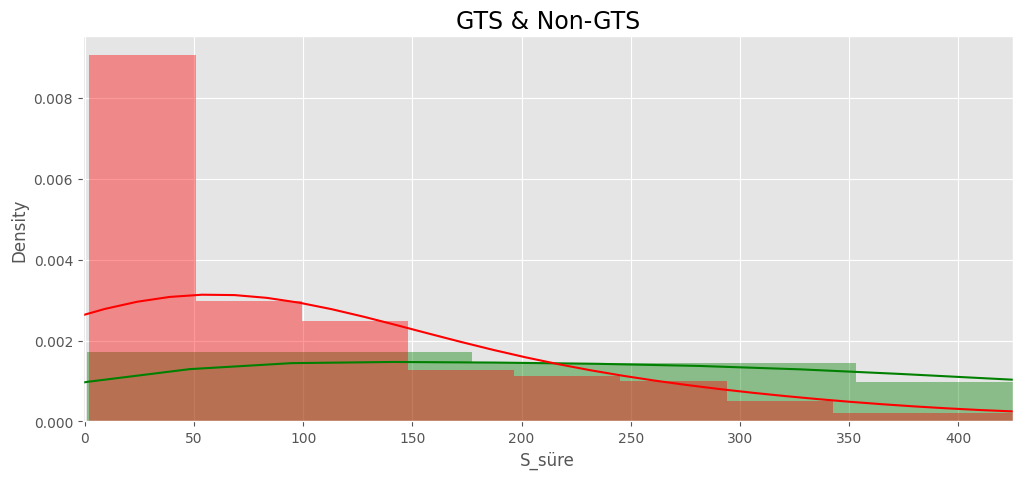

In [78]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Label'] == 0]["S_süre"], 
             color='g')
sns.distplot(df[df['Label'] == 1]["S_süre"], 
             color='r')
plt.title('GTS & Non-GTS', fontsize=17)
plt.xlim([-1,425])
plt.show()

That shows, students that game the system right skew the data. 

In [79]:
#To clearly see the data of GTS and non-GTS
df_gts = df[df['Label'] == 1]
df_nongts = df[df['Label'] == 0]

print("GTS statistics")
print(df_gts["Puan"].describe())
print("\nNon-GTS statistics")
print(df_nongts["Puan"].describe())

GTS statistics
count   290
mean     80
std      25
min      10
25%      70
50%      90
75%     100
max     100
Name: Puan, dtype: float64

Non-GTS statistics
count   7588
mean      76
std       30
min        0
25%       60
50%       90
75%      100
max      100
Name: Puan, dtype: float64


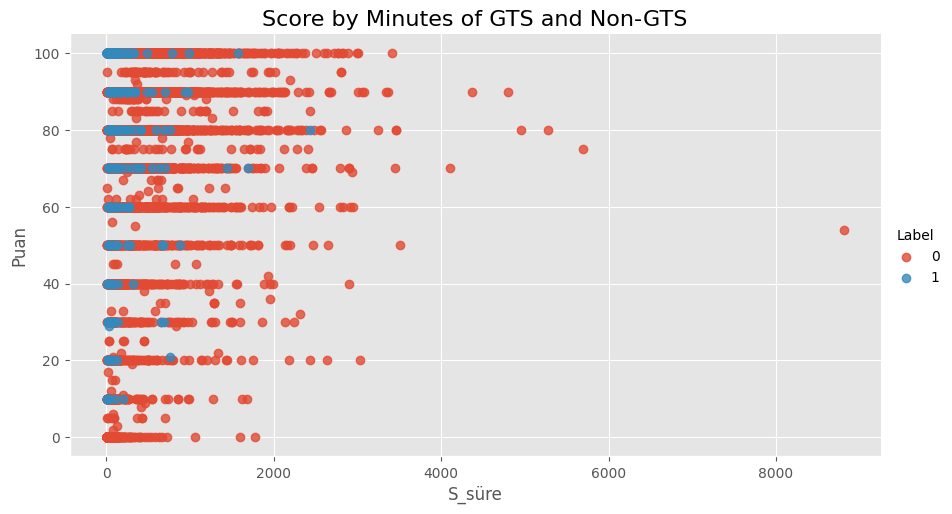

In [80]:
#Looking the Score and time distribuition of GTS.
ax = sns.lmplot(y="Puan", x="S_süre", fit_reg=False,aspect=1.8,
                data=df, hue='Label')
plt.title("Score by Minutes of GTS and Non-GTS",fontsize=16)
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_22332\3540878986.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col][GTS], bins = 50, color='g') #Will receive the "semi-salmon" violin
C:\Users\Samsung\AppData\Local\Temp\ipykernel_22332\3540878986.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

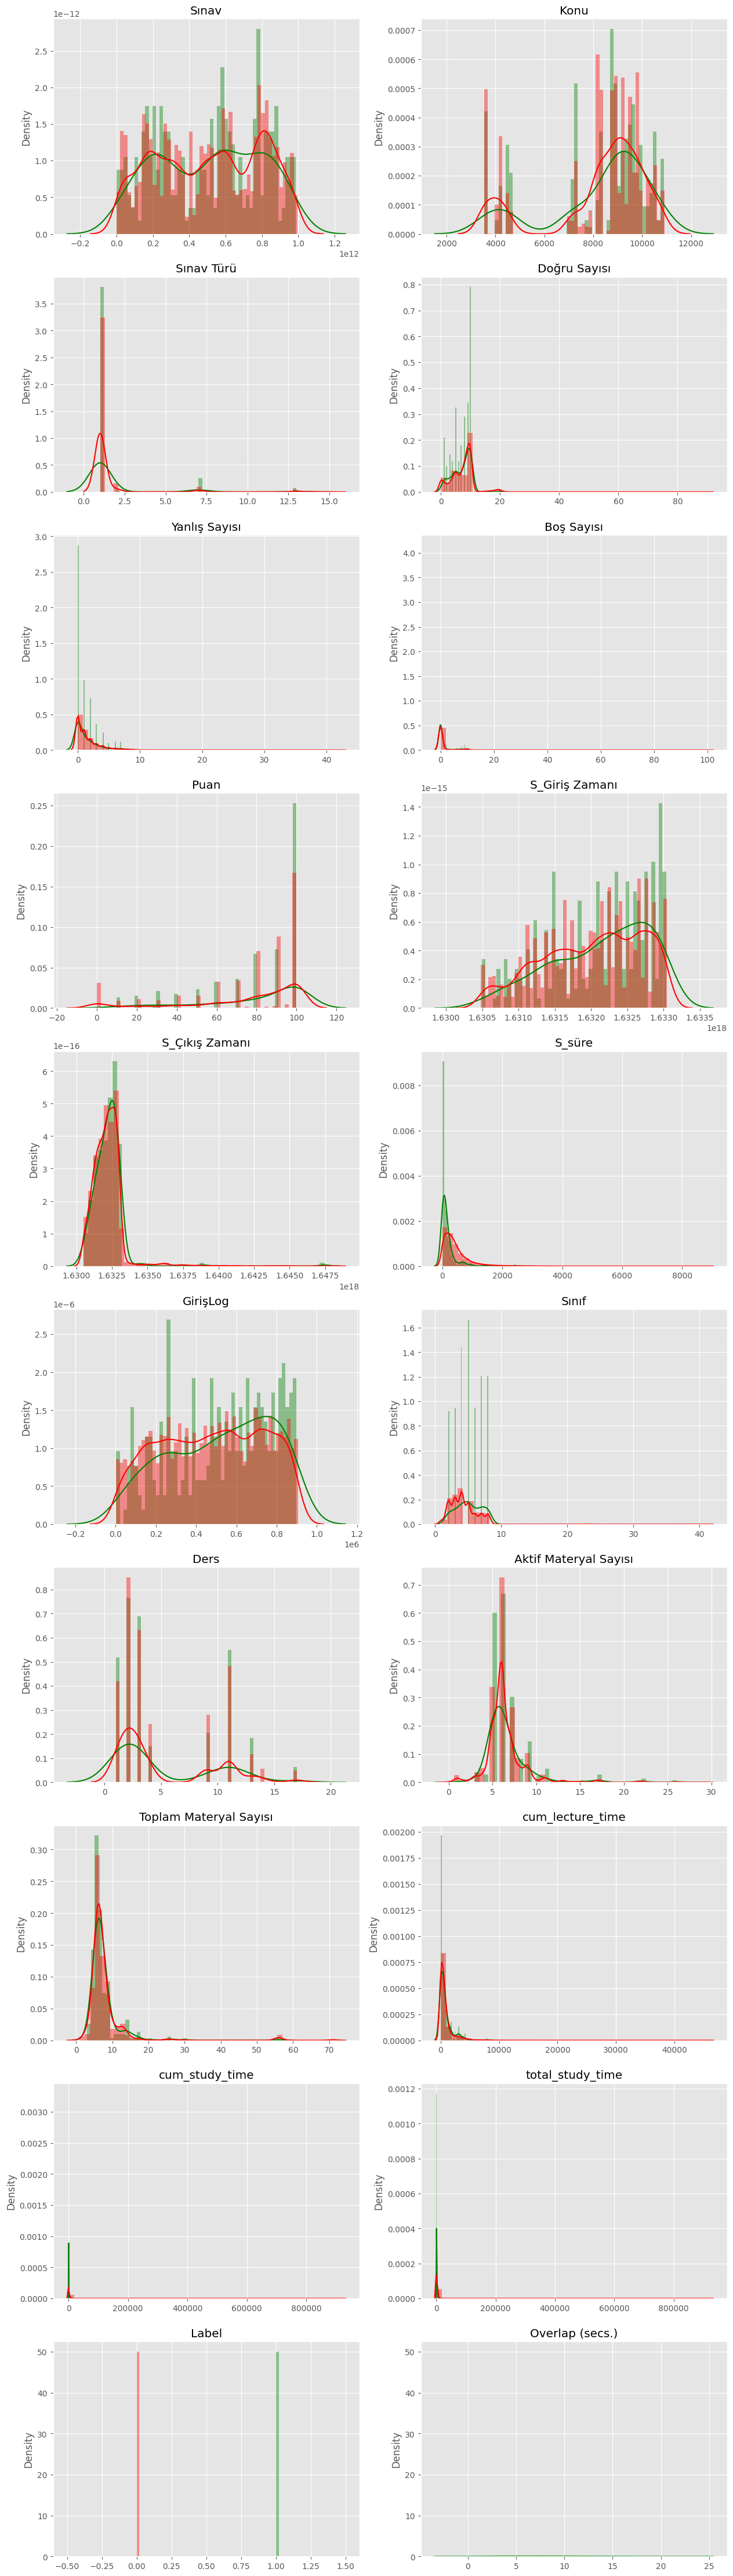

In [81]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

GTS = df.Label == 1
nongts = df.Label == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][GTS], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][nongts], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [82]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

df = df[['Sınav Türü',"Puan","S_süre","Sınıf","Ders","Aktif Materyal Sayısı","total_study_time","Label"]]

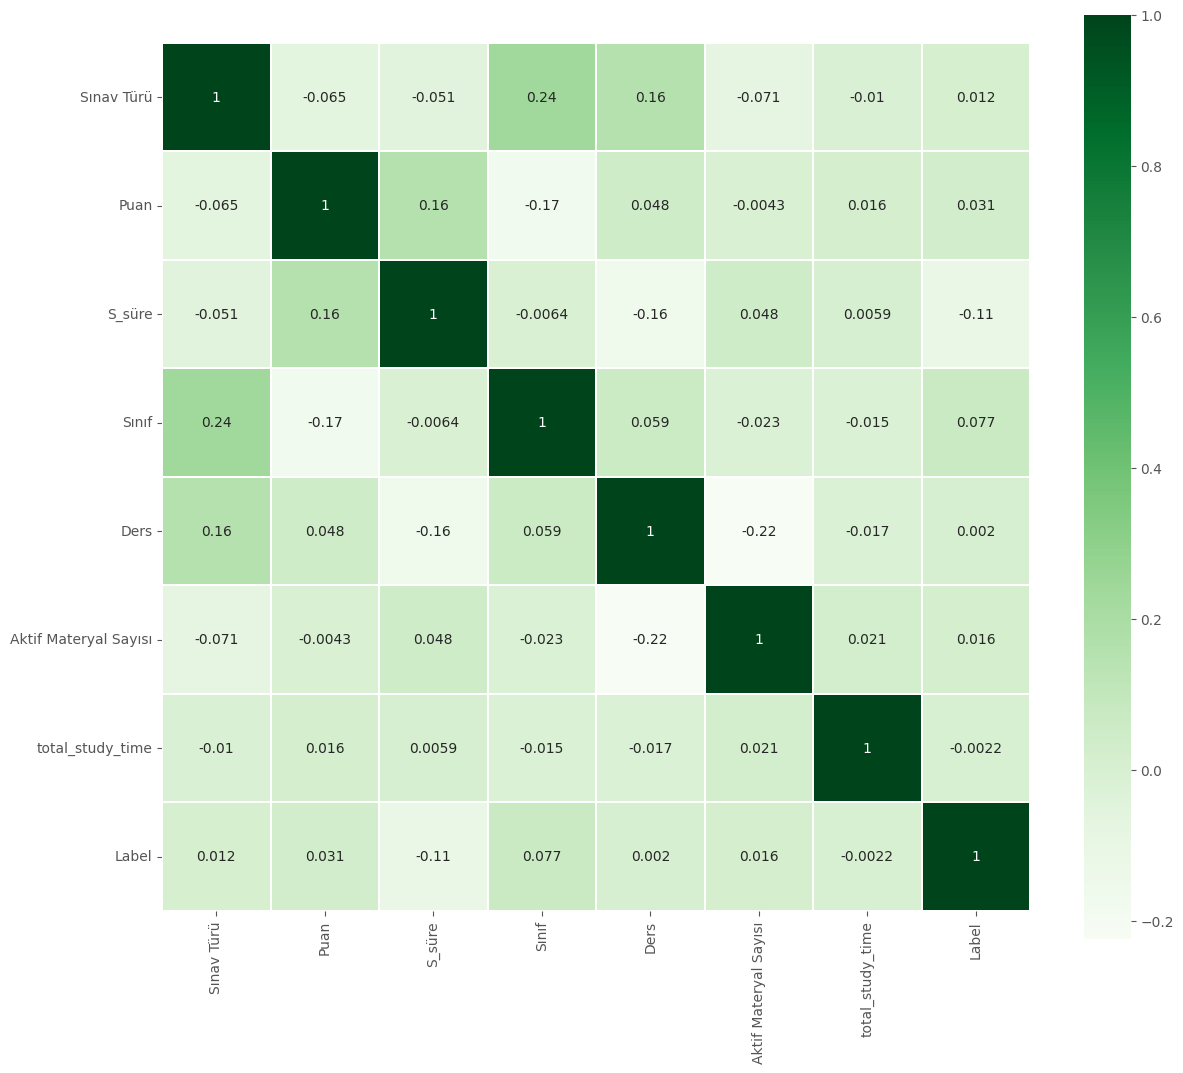

In [83]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [84]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [85]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [86]:
X = df.drop(["Label"], axis=1).values #Setting the X to do the split
y = df["Label"].values # transforming the values in array

In [87]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 7588, 1: 290})
SMOTE data distribution: Counter({0: 7588, 1: 7588})


In [88]:
# Evaluating SMOTE + Random Forest Classifier

print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[1472   55]
 [  35   14]]

SMOTE Pipeline Score 0.9428934010152284

SMOTE + RandomForest classification
accuracy: 0.9428934010152284
precision: 0.2028985507246377
recall: 0.2857142857142857
f2: 0.26415094339622647


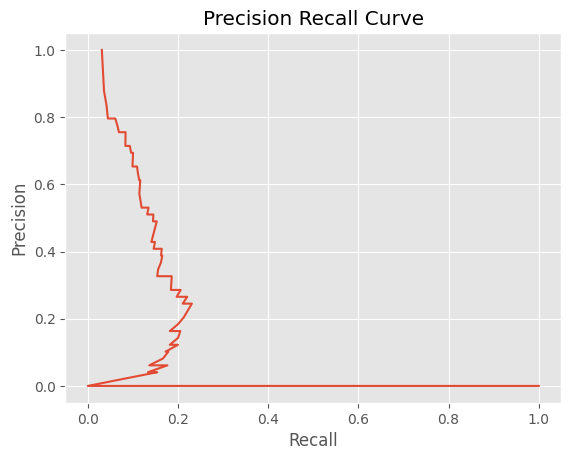

In [89]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [91]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [92]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [93]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.20773809523809522
{'max_depth': None, 'max_features': 7, 'n_estimators': 3}


In [94]:
# Running the fit
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=3)

In [95]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9631862900666455


In [96]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[1519    8]
 [  49    0]]
RF classification
accuracy: 0.9638324873096447
precision: 0.0
recall: 0.0
f2: 0.0


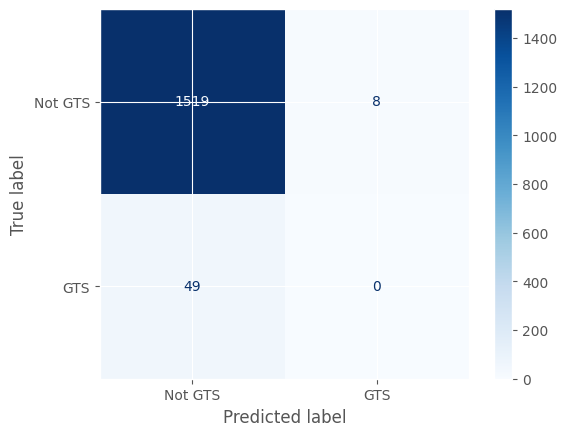

In [97]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues', values_format='d' ,display_labels=['Not GTS', 'GTS'])